#############################################################
#                Veri Madenciliğine Giriş Dersi Projesi                          #
#                Rezzan Işık - 170202043                   #
#                Video Oyun Satış Rakamları                     #
#############################################################


Bu veri kümesi, 100.000 kopyadan fazla satışa sahip video oyunlarının bir listesini içerir. Toplam 16.598 kayıt vardır. 

Alanlar şunları içerir:

Rank - Genel Satışların Sıralaması

Name - Oyunun Adı

Platform - Oyun Sürümünün Platformu

Year - Oyunun Yayınlandığı Yıl

Genre - Oyunun Türü

Publisher - Oyunun Yayıncısı

NA_Sales - Kuzey Amerika Satışları (Milyon)

EU_Sales - Avrupa Birliği Satışları (Milyon)

JP_Sales - Japonya Satışları (Milyon)

Other_Sales - Dünya'nın Geri Kalanının Satışları (Milyon)

Global_Sales - Dünya Çapında Toplam Satış. (Milyon)

# VERİ OKUMA

In [352]:
import numpy as np # lineer Cebir
import pandas as pd # veri işleme

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [353]:
data=pd.read_csv("vgsales.csv")
df=data.copy()

In [354]:
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# VERİ TEMİZLEME

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Elimizde 16598 veri olmasına rağmen bu kadar veri elde edemediğimiz satırlar mevcut.

In [356]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

271 adet 'Year' verisi mevcut değil.

In [357]:
df.Publisher.fillna('Unknown', inplace=True) #  NaN yayıncılar, "bilinmeyen" "Unknown" olarak ayarlanır. 

In [358]:
df.Year.fillna(df.Year.mode()[0], inplace=True) # NaN yıllara yılların modu alınıp atama gerçekleştirilir.

In [359]:
df.Year=df.Year.astype('int64') # NaN yılların kayıt tipi float64 -> int64 olarak değiştirilir 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [360]:
#Değişkenlerin değerleri / kategorileri kontrol edilir.

np.unique(df['Platform'])


array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

"2600" Platformu "ATARİ 2600" anlamına gelmektedir ve bu sağlıklı bir çıktı değildir. Düzeltilir.

In [361]:
df['Platform'].replace('2600', 'Atari', inplace=True)
np.unique(df['Platform'])


array(['3DO', '3DS', 'Atari', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [362]:
np.unique(df['Genre'])

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [363]:
np.unique(df['Year'])

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020], dtype=int64)

In [1120]:
df["Year"].value_counts()


2009    1702
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: Year, dtype: int64

2017 ve 2020 yıllarına ait veri sayısı çok az. Bu verileri siliyoruz. Böylece 1980-2016 arasındaki yıllarda çalışıyoruz.

In [1119]:
df=df[df["Year"]<2017]

# Exploratory Data Analysis(Keşifsel Veri Analizi) ve GÖRSELLEŞTİRME

In [366]:
df.corr() # data setleri arasındaki korelasyona bakılır

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177487,-0.401366,-0.379140,-0.267798,-0.332997,-0.427419
Year,0.177487,1.000000,-0.091391,0.005348,-0.170118,0.040446,-0.075206
NA_Sales,-0.401366,-0.091391,1.000000,0.767725,0.449783,0.634733,0.941047
EU_Sales,-0.379140,0.005348,0.767725,1.000000,0.435577,0.726381,0.902834
JP_Sales,-0.267798,-0.170118,0.449783,0.435577,1.000000,0.290178,0.611811
Other_Sales,-0.332997,0.040446,0.634733,0.726381,0.290178,1.000000,0.748327
Global_Sales,-0.427419,-0.075206,0.941047,0.902834,0.611811,0.748327,1.000000


NA, EU, JP, diğer satışlar arasındaki küresel satışların korelasyonunun güçlü olduğunu görebiliriz.
Yüksek ihtimalle; NA, EU, JP ve diğer satışların toplamı küresel satışlara eşittir.

In [367]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000
mean,8299.409967,2006.446065,0.264715,0.146687,0.077797,0.048073,0.537550
std,4791.349951,5.788537,0.816774,0.505407,0.309326,0.188610,1.555198
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4150.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8299.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12447.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [368]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

Isı Haritası(Heatmap)

Isı haritası(heatmap) üzerinden korelasyonu görebiliriz.

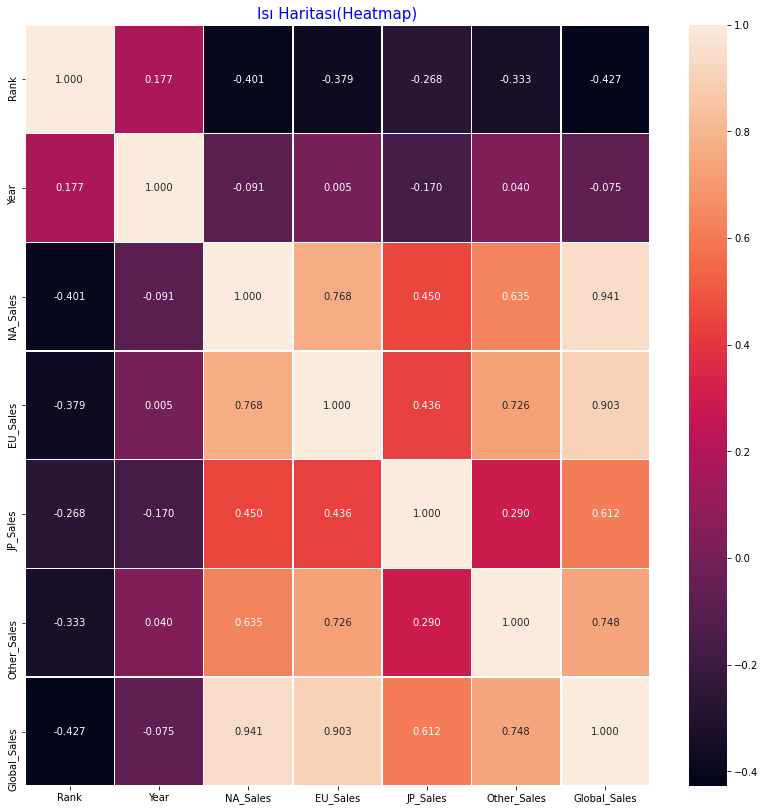

In [19]:
f,ax = plt.subplots(figsize=(14, 14))
plt.title('Isı Haritası(Heatmap)', color = 'blue', fontsize=15)
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax) #heatmap şekilde göstermemiz için, sns de çağırdığımız seaborn kütüphanesi
plt.show()

Veriler arasında ki bağlantıyı regresyon çizgisi ile görebiliriz.

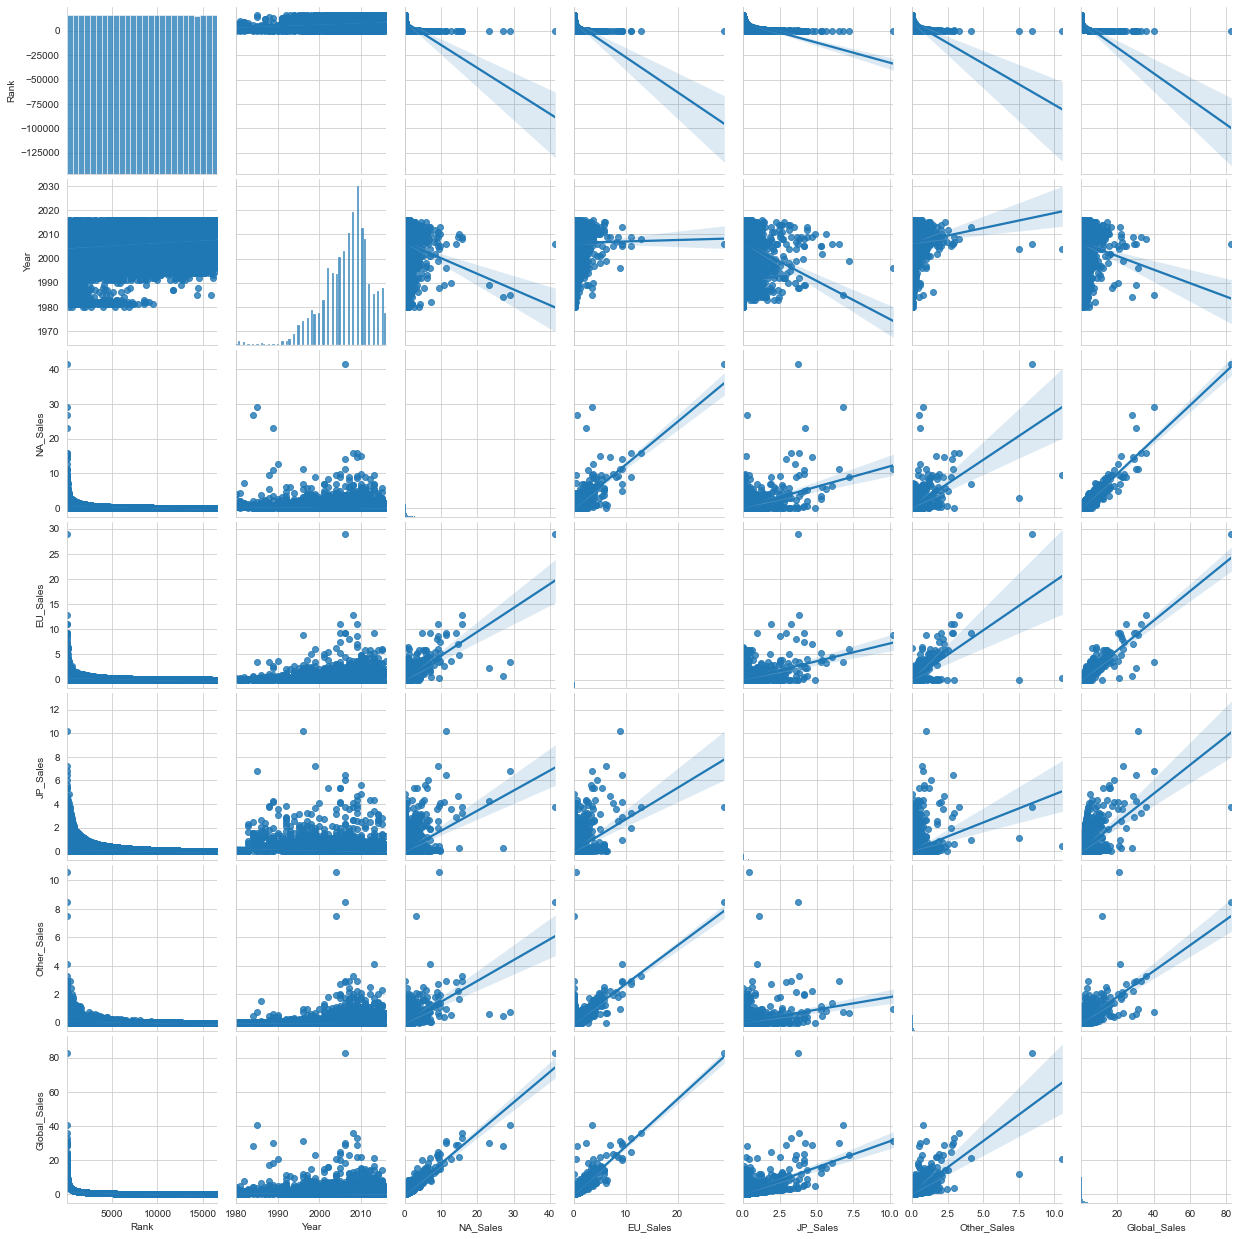

In [194]:
sns.pairplot(df,kind="reg")

Platformlar İçin Üretilmiş Bir Milyon Satışı Geçmiş Toplam Oyun Sayısı

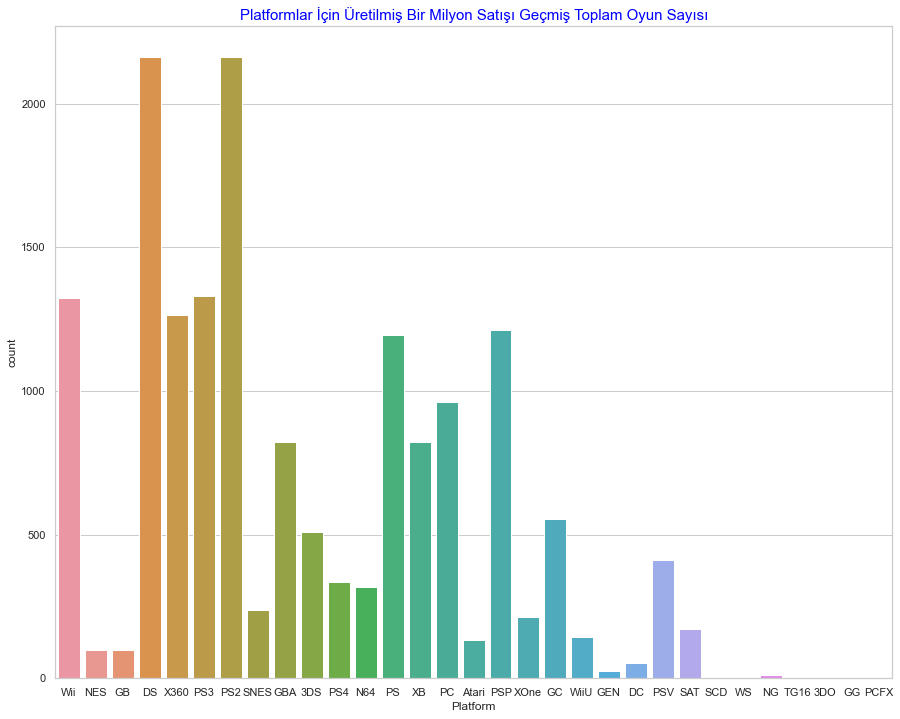

In [510]:
sns.set_style('whitegrid')
fig,(ax1) = plt.subplots(figsize=(15,12))
plt.title('Platformlar İçin Üretilmiş Bir Milyon Satışı Geçmiş Toplam Oyun Sayısı', color = 'blue', fontsize=15)
sns.countplot(x='Platform', data=df, ax=ax1) #sütun grafiği çizdirir
plt.show()

Dünya Çapında En Çok Satan Oyun Türleri

In [21]:
genre = df.Genre.value_counts()
fig = px.pie(genre,
             values= genre.values,
             names= genre.index,
             title='Dünya Çapında En Çok Satan Oyun Türleri')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Yıllara Göre Toplam Küresel Satışlar

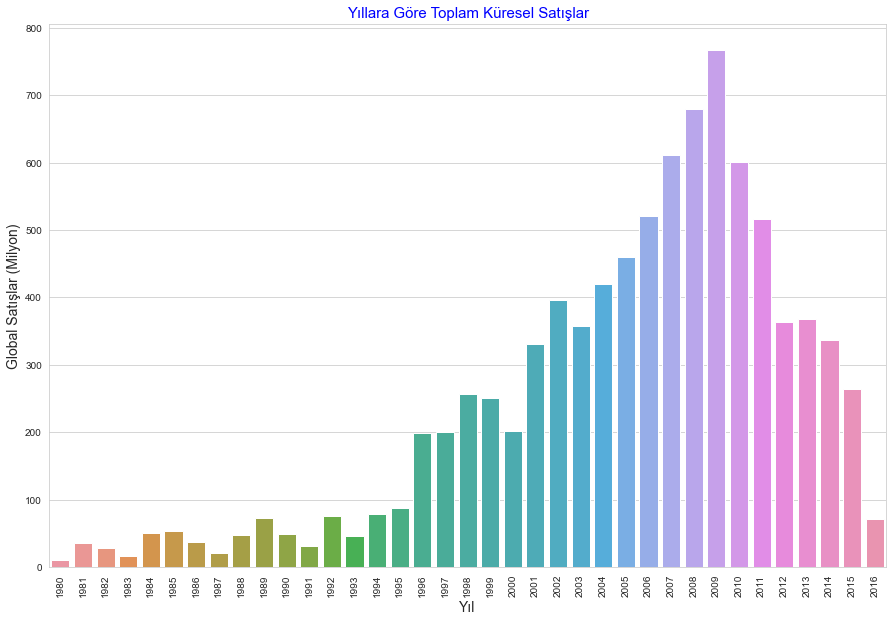

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df.groupby('Year')['Global_Sales'].sum().index, y=df.groupby('Year')['Global_Sales'].sum())  #gruplandırdık
plt.xticks(rotation= 90)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Global Satışlar (Milyon)', fontsize=14)
plt.title('Yıllara Göre Toplam Küresel Satışlar', color = 'blue', fontsize=15)
plt.show()

Oyunların Yıl Bazında Global ve Bölgesel Toplam Satışları

In [23]:
na_sales_year = df.groupby('Year')['NA_Sales'].sum()
na_sales_year_index = df.groupby('Year')['NA_Sales'].sum().index
eu_sales_year = df.groupby('Year')['EU_Sales'].sum()
eu_sales_year_index = df.groupby('Year')['EU_Sales'].sum().index
jp_sales_year = df.groupby('Year')['JP_Sales'].sum()
jp_sales_year_index = df.groupby('Year')['JP_Sales'].sum().index
other_sales_year = df.groupby('Year')['Other_Sales'].sum()
other_sales_year_index = df.groupby('Year')['Other_Sales'].sum().index
global_sales_year = df.groupby('Year')['Global_Sales'].sum()
global_sales_year_index = df.groupby('Year')['Global_Sales'].sum().index

In [24]:
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = global_sales_year_index,
                    y = global_sales_year,
                    mode = "lines",
                    name = "Global / Küresel")
trace2 = go.Scatter(
                    x = global_sales_year_index,
                    y = na_sales_year,
                    mode = "lines+markers",
                    name = "NA / Kuzey Amerika")


trace3 = go.Scatter(
                    x = global_sales_year_index,
                    y = eu_sales_year,
                    mode = "lines",
                    name = "EU / Avrupa Birliği",
                    line = dict(dash="dot"))

trace4 = go.Scatter(
                    x = global_sales_year_index,
                    y = jp_sales_year,
                    mode = "lines",
                    name = "JP / Japonya",
                    line = dict(dash="dash"))

trace5 = go.Scatter(
                    x = global_sales_year_index,
                    y = other_sales_year,
                    mode = "lines",
                    name = "Other / Diğerleri")


data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Oyunların Yıl Bazında Global ve Bölgesel Toplam Satışları',
              xaxis= dict(title= 'Yıl',ticklen= 5,zeroline= False), 
              yaxis= dict(title= 'Global Satışlar (Milyon)',ticklen= 5,zeroline= False))
fig = dict(data = data, layout = layout)
iplot(fig)

En Çok Satış Yapan Firmalar

En çok satış yapan ilk 20 firma baz alınmıştır.

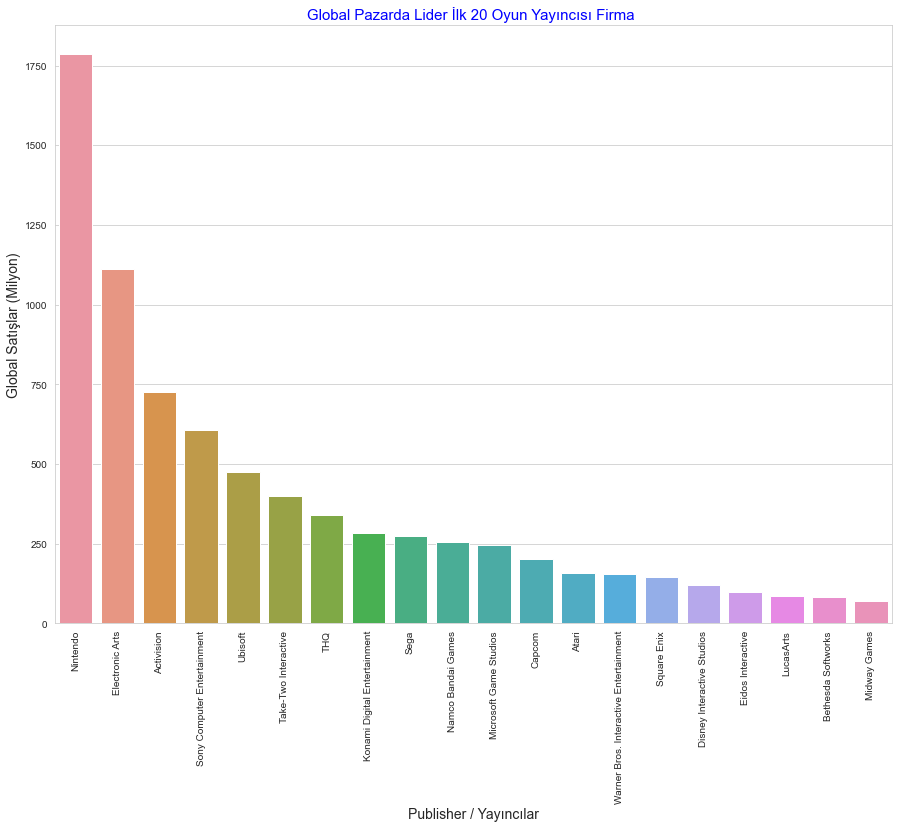

In [30]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)  # ilk 20 firma atanır
sale_pbl = pd.DataFrame(sale_pbl).reset_index() # Datanın indexi resetlenir 0-19. Aksi halde grafik oluşturulamaz.

plt.figure(figsize=(15, 11))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation= 90)
plt.xlabel('Publisher / Yayıncılar', fontsize=14)
plt.ylabel('Global Satışlar (Milyon)', fontsize=14)
plt.title('Global Pazarda Lider İlk 20 Oyun Yayıncısı Firma ', color = 'blue', fontsize=15)
plt.show()

Bölgelerin Toplam Satıştaki Pazar Payı

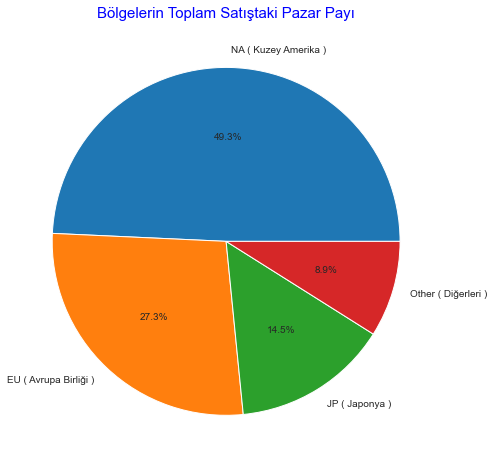

In [445]:
bolgeler = [df.NA_Sales.sum(),df.EU_Sales.sum(),df.JP_Sales.sum(),df.Other_Sales.sum()] #bölgesel toplam satışlar atanır
labels = ['NA ( Kuzey Amerika )', 'EU ( Avrupa Birliği )', 'JP ( Japonya )', 'Other ( Diğerleri )']

plt.figure(figsize = (8,8))
plt.pie(bolgeler, labels=labels, autopct='%1.1f%%')
plt.title('Bölgelerin Toplam Satıştaki Pazar Payı', color = 'blue', fontsize = 15)
plt.show()

2010 Sonrası Xbox / PC / PS4  İçin En Çok Satan 10 Oyun

In [27]:
pc = df[(df.Year >= 2010) & (df.Platform == 'PC')].head(10)
ps4 = df[(df.Year >= 2010) & (df.Platform == 'PS4')].head(10)
xone = df[(df.Year >= 2010) & (df.Platform == 'XOne')].head(10)

fig = go.Figure(data=[
    go.Bar(name='Xbox One', x=xone.Name, y=xone.Global_Sales),
    go.Bar(name='PC', x=pc.Name, y=pc.Global_Sales),
    go.Bar(name='PS4', x=ps4.Name, y=ps4.Global_Sales)
])

fig.update_layout(barmode='group', title_text='2010 Sonrası Xbox / PC / PS4  İçin En Çok Satan 10 Oyun')
fig.show()

# ALGORİTMALAR & Algoritmaların Karşılaştırmalı Başarım Analizi

In [1097]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [1098]:
#Küme verilerini oluşturur
X = df.iloc[:, 7:11].values
y = df.iloc[:, -1].values

In [1099]:
clf=['Karar Ağacı(Decision Tree) Regresyonu','Random Forest Regresyonu','SVR (Support Vector Regression)','Ridge Regresyonu','Lasso Regresyonu','Elastic Net Regrasyonu']
tr=[]
ts=[]
r2=[]

In [1100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Karar Ağacı(Decision Tree) Regresyonu

In [1101]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test)

tr.append(dtr.score(X_train, y_train))
ts.append(dtr.score(X_test, y_test))
r2.append(r2_score(y_test,y_preddtr))

In [1102]:
print("Training/Eğitim Doğruluğu :", dtr.score(X_train, y_train))
print("Test Doğruluğu :", dtr.score(X_test, y_test))
print(r2_score(y_test,y_preddtr))


Training/Eğitim Doğruluğu : 1.0
Test Doğruluğu : 0.9983406831621846
0.9983406831621846


Random Forest Regresyonu

In [1103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)

tr.append(rfr.score(X_train, y_train))
ts.append(rfr.score(X_test, y_test))
r2.append(r2_score(y_test,y_predrfr))

In [1104]:
print("Training/Eğitim Doğruluğu :", rfr.score(X_train, y_train))
print("Test Doğruluğu :", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Training/Eğitim Doğruluğu : 0.9730569516865958
Test Doğruluğu : 0.9995878139712518
0.9995878139712518


SVR(Support Vector Regression) Destek Vektör Regresyonu

In [1105]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
y_predsvr = svr.predict(X_test)

tr.append(svr.score(X_train, y_train))
ts.append(svr.score(X_test, y_test))
r2.append(r2_score(y_test,y_predsvr))

In [1106]:
print("Training/Eğitim Doğruluğu :", svr.score(X_train, y_train))
print("Test Doğruluğu :", svr.score(X_test, y_test))

print(r2_score(y_test,y_predsvr))

Training/Eğitim Doğruluğu : 0.6674683308873681
Test Doğruluğu : 0.8755919235562429
0.8755919235562429


Ridge Regresyonu

In [1107]:
from sklearn.linear_model import Ridge
r = Ridge()
r = r.fit(X_train,y_train)
y_predr = r.predict(X_test)

tr.append(r.score(X_train, y_train))
ts.append(r.score(X_test, y_test))
r2.append(r2_score(y_test,y_predr))

In [1108]:
print("Training/Eğitim Doğruluğu :", r.score(X_train, y_train))
print("Test Doğruluğu :", r.score(X_test, y_test))
print(r2_score(y_test,y_predr))

Training/Eğitim Doğruluğu : 0.9999999921529011
Test Doğruluğu : 0.9999999935273011
0.9999999935273011


Lasso Regresyonu

In [1109]:
from sklearn.linear_model import Lasso
l = Lasso()
l = l.fit(X_train,y_train)
y_predl = l.predict(X_test)

tr.append(l.score(X_train, y_train))
ts.append(l.score(X_test, y_test))
r2.append(r2_score(y_test,y_predl))

In [1110]:
print("Training/Eğitim Doğruluğu :", l.score(X_train, y_train))
print("Test Doğruluğu :", l.score(X_test, y_test))
print(r2_score(y_test,y_predl))

Training/Eğitim Doğruluğu : 0.8499669180555743
Test Doğruluğu : 0.8499656238103191
0.8499656238103191


Elastic Net Regrasyonu

In [1111]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train,y_train)
y_predEnet = enet.predict(X_test)

tr.append(enet.score(X_train, y_train))
ts.append(enet.score(X_test, y_test))
r2.append(r2_score(y_test,y_predEnet))

In [1112]:
from sklearn.metrics import r2_score

print("Training/Eğitim Doğruluğu :", enet.score(X_train, y_train))
print("Test Doğruluğu :", enet.score(X_test, y_test))
print(r2_score(y_test,y_predEnet))


Training/Eğitim Doğruluğu : 0.8947024918716941
Test Doğruluğu : 0.8947015835333563
0.8947015835333563


# 6 ALGORİTMANIN KARŞILAŞTIRILMASI

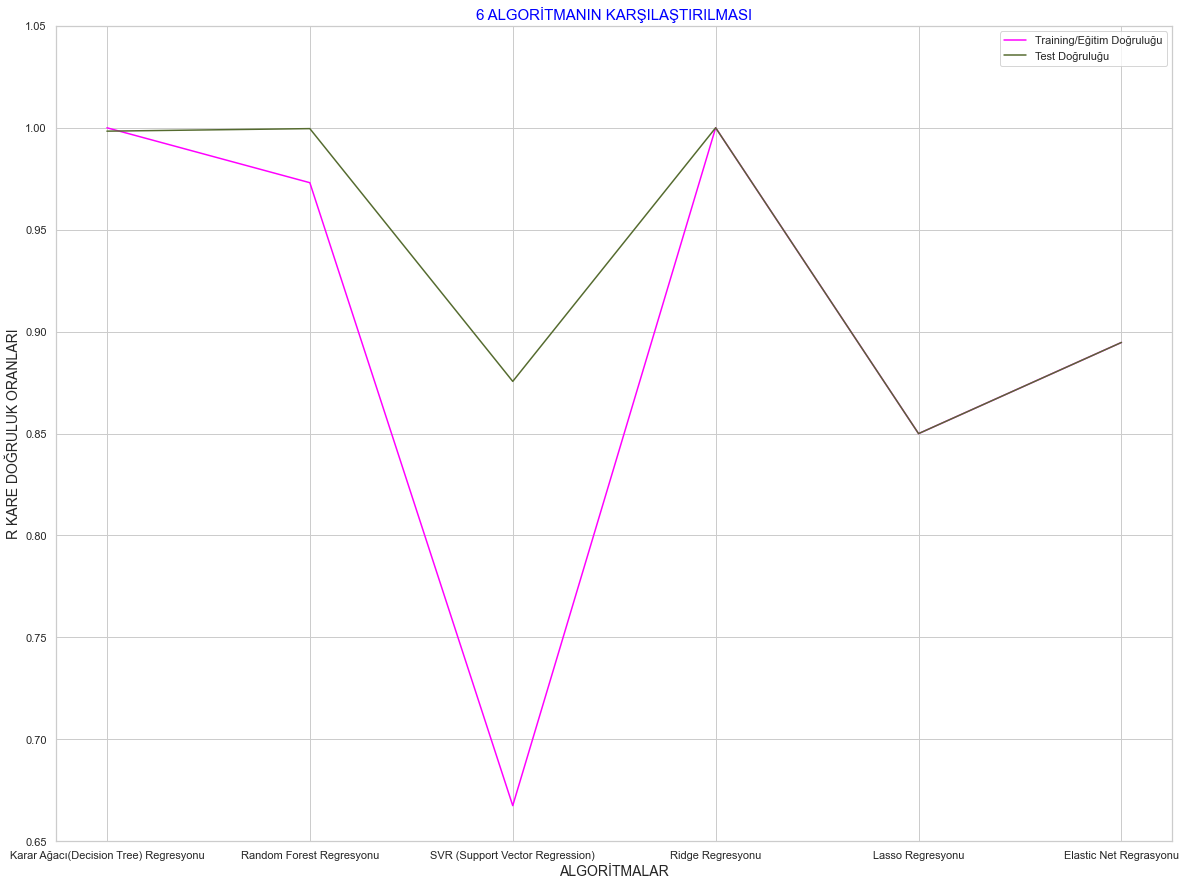

In [1117]:
plt.figure(figsize=(20, 15))
plt.plot(clf,tr,color='magenta',label='Training/Eğitim Doğruluğu')
plt.plot(clf,ts,color='darkolivegreen',label='Test Doğruluğu')
plt.xlabel('ALGORİTMALAR', fontsize=14)
plt.ylabel('R KARE DOĞRULUK ORANLARI', fontsize=14)
plt.yticks(np.arange(0.65, 1.1, step=0.05))
plt.title('6 ALGORİTMANIN KARŞILAŞTIRILMASI',  color = 'blue', fontsize = 15)
plt.legend()
plt.show()

C:\Users\ZZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



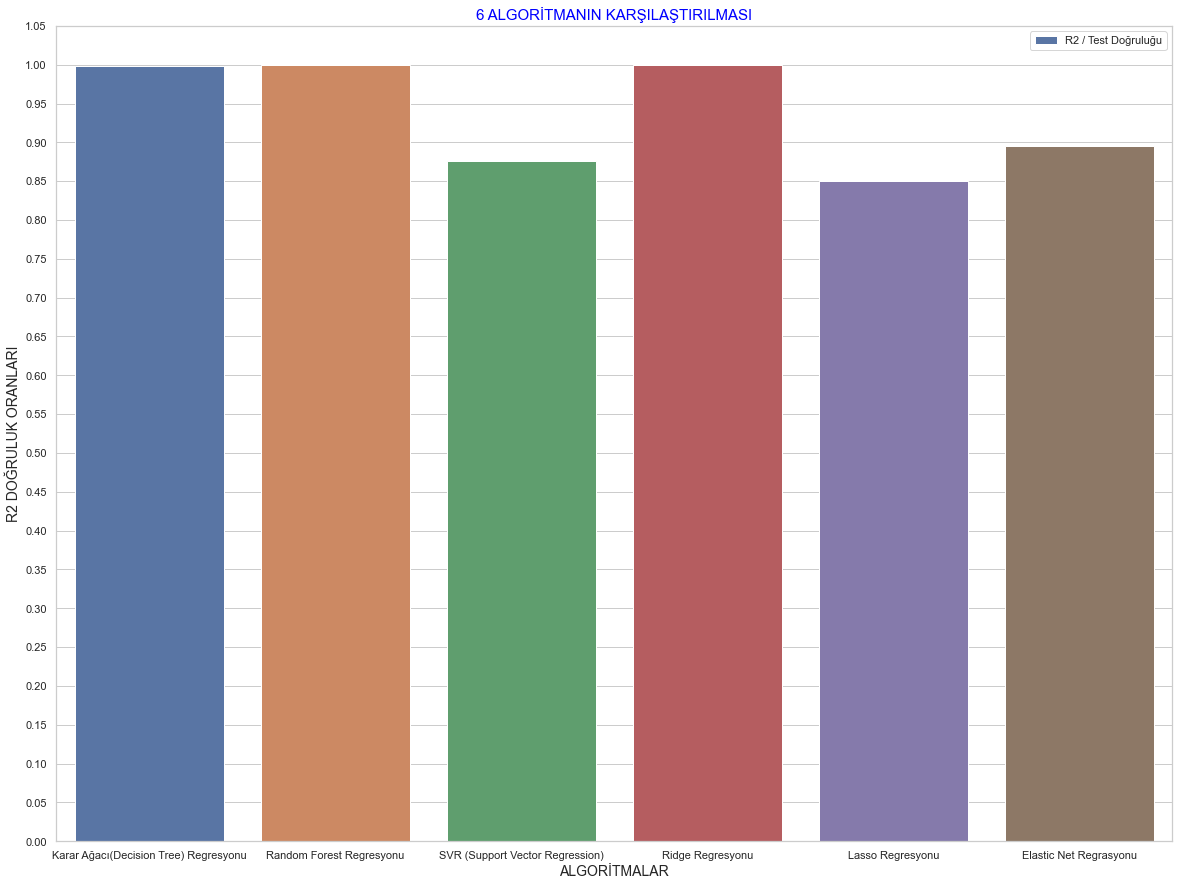

In [1118]:
plt.figure(figsize=(20, 15))
sns.barplot(clf,r2, label='R2 / Test Doğruluğu')
plt.xlabel('ALGORİTMALAR', fontsize=14)
plt.ylabel('R2 DOĞRULUK ORANLARI', fontsize=14)
#plt.xticks(rotation= 90)
plt.yticks(np.arange(0, 1.1, step=0.05))
plt.title('6 ALGORİTMANIN KARŞILAŞTIRILMASI',  color = 'blue', fontsize = 15)
plt.legend()
plt.show()

In [1060]:
clf,r2

(['Karar Ağacı(Decision Tree) Regresyonu',
  'Random Forest Regresyonu',
  'SVR (Support Vector Regression)',
  'Ridge Regresyonu',
  'Lasso Regresyonu',
  'EN'],
 [0.9983406831621846,
  0.9995878139712518,
  0.8755919235562429,
  0.9999999935273011,
  0.8499656238103191,
  0.8947015835333563])